In [1]:
!pip install -U --pre tensorflow=="2.2.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl (516.2 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

In [2]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [3]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696518 sha256=7d8d02c2193861595068705b4cbfa3d95e5b9d6767d20f30136380d307a6a63d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ndtio99q/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
   

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


Loading model...Done! Took 16.330235719680786 seconds
Running inference for /content/photo-1589828155685-83225f7d91f3.jpg... Done


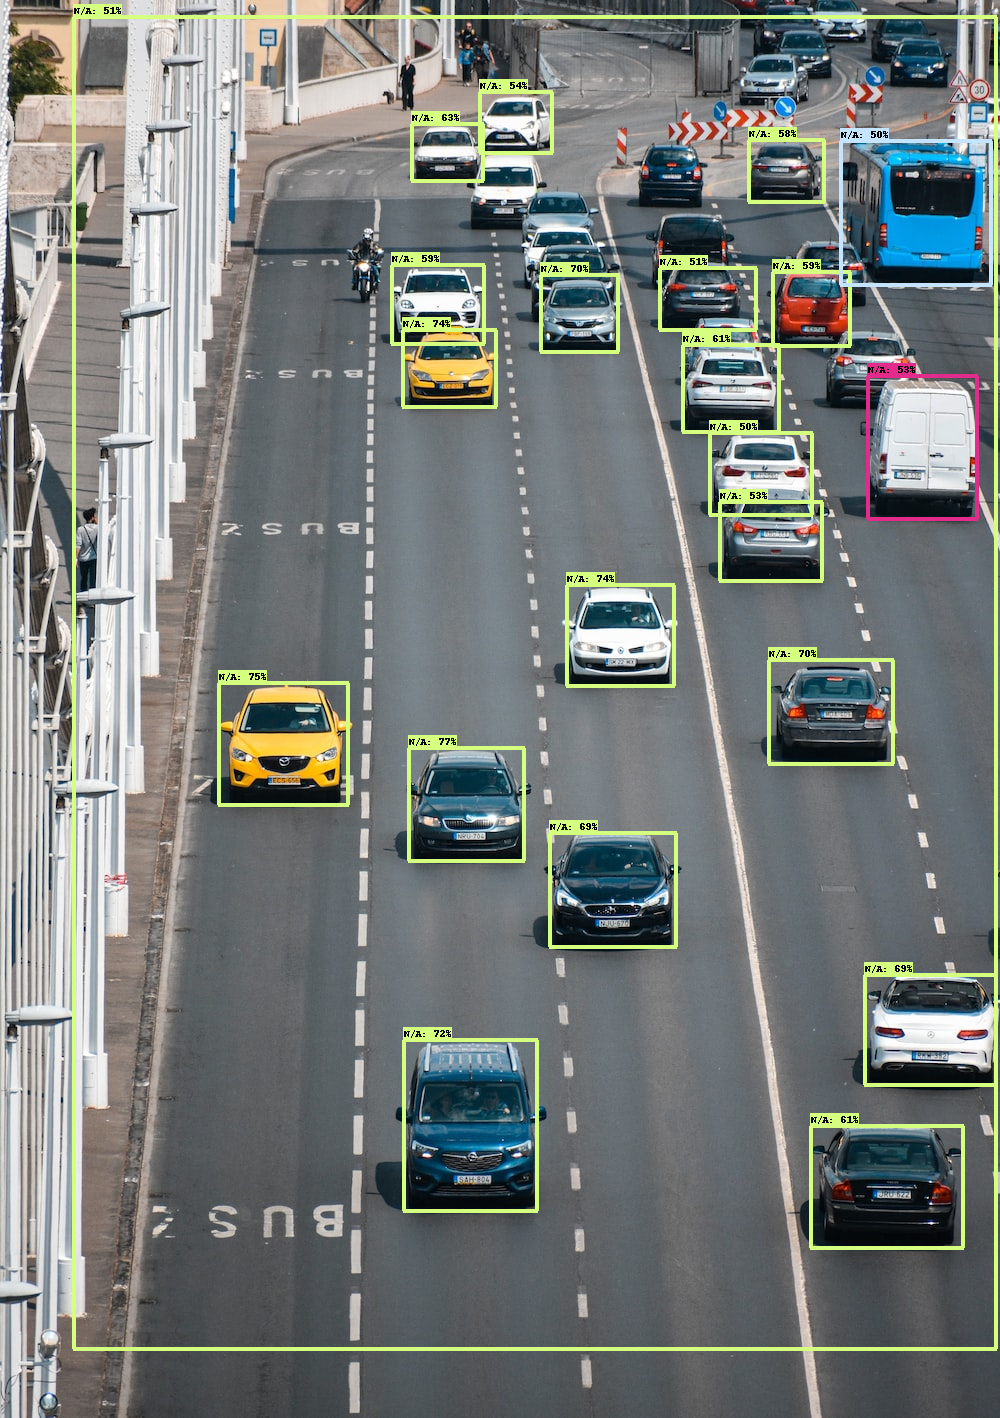

In [14]:
# """
# Object Detection (On Image) From TF2 Saved Model
# =====================================
# """

# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
# import pathlib
# import tensorflow as tf
# import cv2
# import argparse
# from google.colab.patches import cv2_imshow

# # Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# # PROVIDE PATH TO IMAGE DIRECTORY
# IMAGE_PATHS = '/content/photo-1589828155685-83225f7d91f3.jpg'


# # PROVIDE PATH TO MODEL DIRECTORY
# PATH_TO_MODEL_DIR = '/content/my_model'

# # PROVIDE PATH TO LABEL MAP
# PATH_TO_LABELS = '/content/label_map.pbtxt'

# # PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
# MIN_CONF_THRESH = float(0.60)

# # LOAD THE MODEL

# import time
# from object_detection.utils import label_map_util
# from object_detection.utils import visualization_utils as viz_utils

# PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

# print('Loading model...', end='')
# start_time = time.time()

# # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
# detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# end_time = time.time()
# elapsed_time = end_time - start_time
# print('Done! Took {} seconds'.format(elapsed_time))

# # LOAD LABEL MAP DATA FOR PLOTTING

# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
#                                                                     use_display_name=True)

# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# def load_image_into_numpy_array(path):
#     """Load an image from file into a numpy array.
#     Puts image into numpy array to feed into tensorflow graph.
#     Note that by convention we put it into a numpy array with shape
#     (height, width, channels), where channels=3 for RGB.
#     Args:
#       path: the file path to the image
#     Returns:
#       uint8 numpy array with shape (img_height, img_width, 3)
#     """
#     return np.array(Image.open(path))




# print('Running inference for {}... '.format(IMAGE_PATHS), end='')

# image = cv2.imread(IMAGE_PATHS)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image_expanded = np.expand_dims(image_rgb, axis=0)

# # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
# input_tensor = tf.convert_to_tensor(image)
# # The model expects a batch of images, so add an axis with `tf.newaxis`.
# input_tensor = input_tensor[tf.newaxis, ...]

# # input_tensor = np.expand_dims(image_np, 0)
# detections = detect_fn(input_tensor)

# # All outputs are batches tensors.
# # Convert to numpy arrays, and take index [0] to remove the batch dimension.
# # We're only interested in the first num_detections.
# num_detections = int(detections.pop('num_detections'))
# detections = {key: value[0, :num_detections].numpy()
#                for key, value in detections.items()}
# detections['num_detections'] = num_detections

# # detection_classes should be ints.
# detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# image_with_detections = image.copy()

# # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
# viz_utils.visualize_boxes_and_labels_on_image_array(
#       image_with_detections,
#       detections['detection_boxes'],
#       detections['detection_classes'],
#       detections['detection_scores'],
#       category_index,
#       use_normalized_coordinates=True,
#       max_boxes_to_draw=200,
#       min_score_thresh=0.5,
#       agnostic_mode=False)

# print('Done')
# # DISPLAYS OUTPUT IMAGE
# cv2_imshow(image_with_detections)
# # CLOSES WINDOW ONCE KEY IS PRESSED


In [4]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [16]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(path).convert('RGB')
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Load the COCO Label Map
category_index = {
    1: {'id': 1, 'name': 'letter'},
}


In [6]:
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('/content/my_model/saved_model/')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 25.71955418586731s


Elapsed time: 0.27487218379974365 second per image


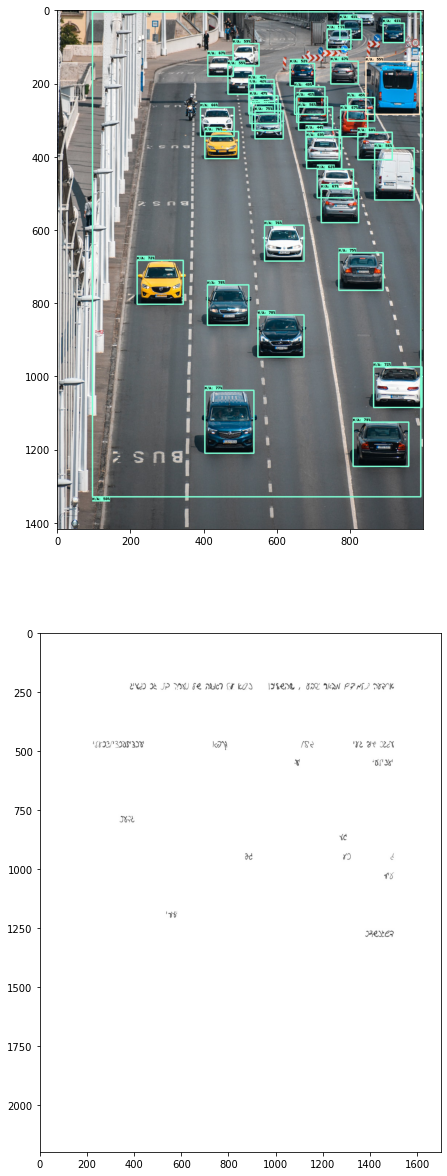

In [19]:
import time

image_dir = '/content/test_images'

elapsed = []
for i in range(2):
  image_path = os.path.join(image_dir, 'image' + str(i + 1) + '.jpg')
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  elapsed.append(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
  plt.subplot(2, 1, i+1)
  plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')